In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

client_df=pd.read_csv('../data/client_data.csv')
price_df=pd.read_csv('../data/price_data.csv')

In [36]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [37]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


### `client_data.csv`

- **id**: client company identifier
- **activity_new**: category of the company’s activity
- **channel_sales**: code of the sales channel
- **cons_12m**: electricity consumption of the past 12 months
- **cons_gas_12m**: gas consumption of the past 12 months
- **cons_last_month**: electricity consumption of the last month
- **date_activ**: date of activation of the contract
- **date_end**: registered date of the end of the contract
- **date_modif_prod**: date of the last modification of the product
- **date_renewal**: date of the next contract renewal
- **forecast_cons_12m**: forecasted electricity consumption for next 12 months
- **forecast_cons_year**: forecasted electricity consumption for the next calendar year
- **forecast_discount_energy**: forecasted value of current discount
- **forecast_meter_rent_12m**: forecasted bill of meter rental for the next 2 months
- **forecast_price_energy_off_peak**: forecasted energy price for 1st period (off peak)
- **forecast_price_energy_peak**: forecasted energy price for 2nd period (peak)
- **forecast_price_pow_off_peak**: forecasted power price for 1st period (off peak)
- **has_gas**: indicated if client is also a gas client
- **imp_cons**: current paid consumption
- **margin_gross_pow_ele**: gross margin on power subscription
- **margin_net_pow_ele**: net margin on power subscription
- **nb_prod_act**: number of active products and services
- **net_margin**: total net margin
- **num_years_antig**: antiquity of the client (in number of years)
- **origin_up**: code of the electricity campaign the customer first subscribed to
- **pow_max**: subscribed power
- **churn**: has the client churned over the next 3 months

### `price_data.csv`

- **id**: client company identifier
- **price_date**: reference date
- **price_off_peak_var**: price of energy for the 1st period (off peak)
- **price_peak_var**: price of energy for the 2nd period (peak)
- **price_mid_peak_var**: price of energy for the 3rd period (mid peak)
- **price_off_peak_fix**: price of power for the 1st period (off peak)
- **price_peak_fix**: price of power for the 2nd period (peak)
- **price

_mid_peak_fix**: price of power for the 3rd period (mid peak)

**Note**: Some fields are hashed text strings. This preserves the privacy of the original data, but the commercial meaning is retained, and they may have predictive power.

In [38]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [39]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [40]:
client_df.channel_sales.unique()

array(['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING',
       'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa'], dtype=object)

As mentioned in description of data, some informations are hashed text strings, however for visuals and other analysis methods this is not a good way to represent information. While we may lack the real-world meaning of this sales channels and similar other values, we can give simpler names, such as "channel_1" etc. for non missing values.

In [41]:
client_df.has_gas.unique()

array(['t', 'f'], dtype=object)

Can be converted to 1 and 0

In [42]:
client_df.origin_up.unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', 'MISSING',
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

Can be converted into suitable readable classes

In [43]:
client_df.date_activ.head(2)

0    2013-06-15
1    2009-08-21
Name: date_activ, dtype: object

Date information is stored as objects, this can be converted into datetime data type.

## Data Cleaning

1. Target and handle "MISSING" value.
2. Convert 't' and 'f' valeus to 1 and 0.
3. Convert hashed text information such as "lxidpiddsbxsbosboudacockeimpuepw" to more readable and visualized names.
4. Convert dates that are stored as objects to datetime, which will be helpful in visualization if time axed visualize will made.


In [44]:
# Handling missing objects in "Origin_up"
# Used method for imputing will be kNN imputer

#First lets turn all 'MISSING' values into null values
client_df.replace('MISSING', pd.NA, inplace=True)

#And check again for null values in general:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   10881 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

 So only two features, "channel_sales" and "origin_up" contains null values

In [45]:
# Creating function two impute this two category
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def random_forest_imputer(df, column_name):
    # Select only numerical columns (excluding the target column)
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if column_name in numerical_cols:
        numerical_cols.remove(column_name)

    # Splitting the data into two parts: one where target column is missing and one where it's not
    df_with_target = df[df[column_name].notna()]
    df_without_target = df[df[column_name].isna()]

    # Prepare your features (X) and target (y) using only numerical columns
    X = df_with_target[numerical_cols]
    y = df_with_target[column_name]

    # Splitting the data for training and validation
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predicting the missing values
    predicted_values = model.predict(df_without_target[numerical_cols])

    # Fill in the missing values in the original DataFrame
    df.loc[df[column_name].isna(), column_name] = predicted_values
    return df
    
#Before doing imputation lets create a backup of both dataset
backup_client_df=client_df.copy()
backup_price_df=price_df.copy()

client_df=random_forest_imputer(client_df,"origin_up")
client_df=random_forest_imputer(client_df,"channel_sales")


In [46]:
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [50]:
#Lets check if price has any missing values before moving on.
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

We have imputed missing files with logical selection using random forest classifier.

Now let's adress problem of hashed text and give them better categorical name.

In [47]:
def replace_hashed_strings(df, column_name,string):
    unique_values = df[column_name].unique()
    replacement_dict = {val: f'{string}_{i+1}' for i, val in enumerate(unique_values)}

    df[column_name] = df[column_name].map(replacement_dict)
    return df

client_df=replace_hashed_strings(client_df,"origin_up","origin")
client_df=replace_hashed_strings(client_df,"channel_sales","channel")


In [49]:
client_df.channel_sales.unique()

array(['channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5',
       'channel_6', 'channel_7'], dtype=object)

Looks good!

In [51]:
# Replacing string "t" and "f" with 1 and 0
replace_dict={
	'f':0,
	't':1
}
client_df.has_gas.replace(replace_dict,inplace=True)

Finally we must change the date values that are stored as object to datetime:
- date_activ         
- date_end     
- date_modif_prod 
- date_renewal

In [52]:
client_df.date_activ.head()

0    2013-06-15
1    2009-08-21
2    2010-04-16
3    2010-03-30
4    2010-01-13
Name: date_activ, dtype: object

In [55]:
def convert_to_datetime(df, column_names):
    for column in column_names:
        df[column] = pd.to_datetime(df[column], errors='coerce')
    return df


column_names = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
client_df = convert_to_datetime(client_df, column_names)

In [56]:
client_df.date_activ.head()

0   2013-06-15
1   2009-08-21
2   2010-04-16
3   2010-03-30
4   2010-01-13
Name: date_activ, dtype: datetime64[ns]

This concludes the data cleaning part.

## Exploratory Data Analysis

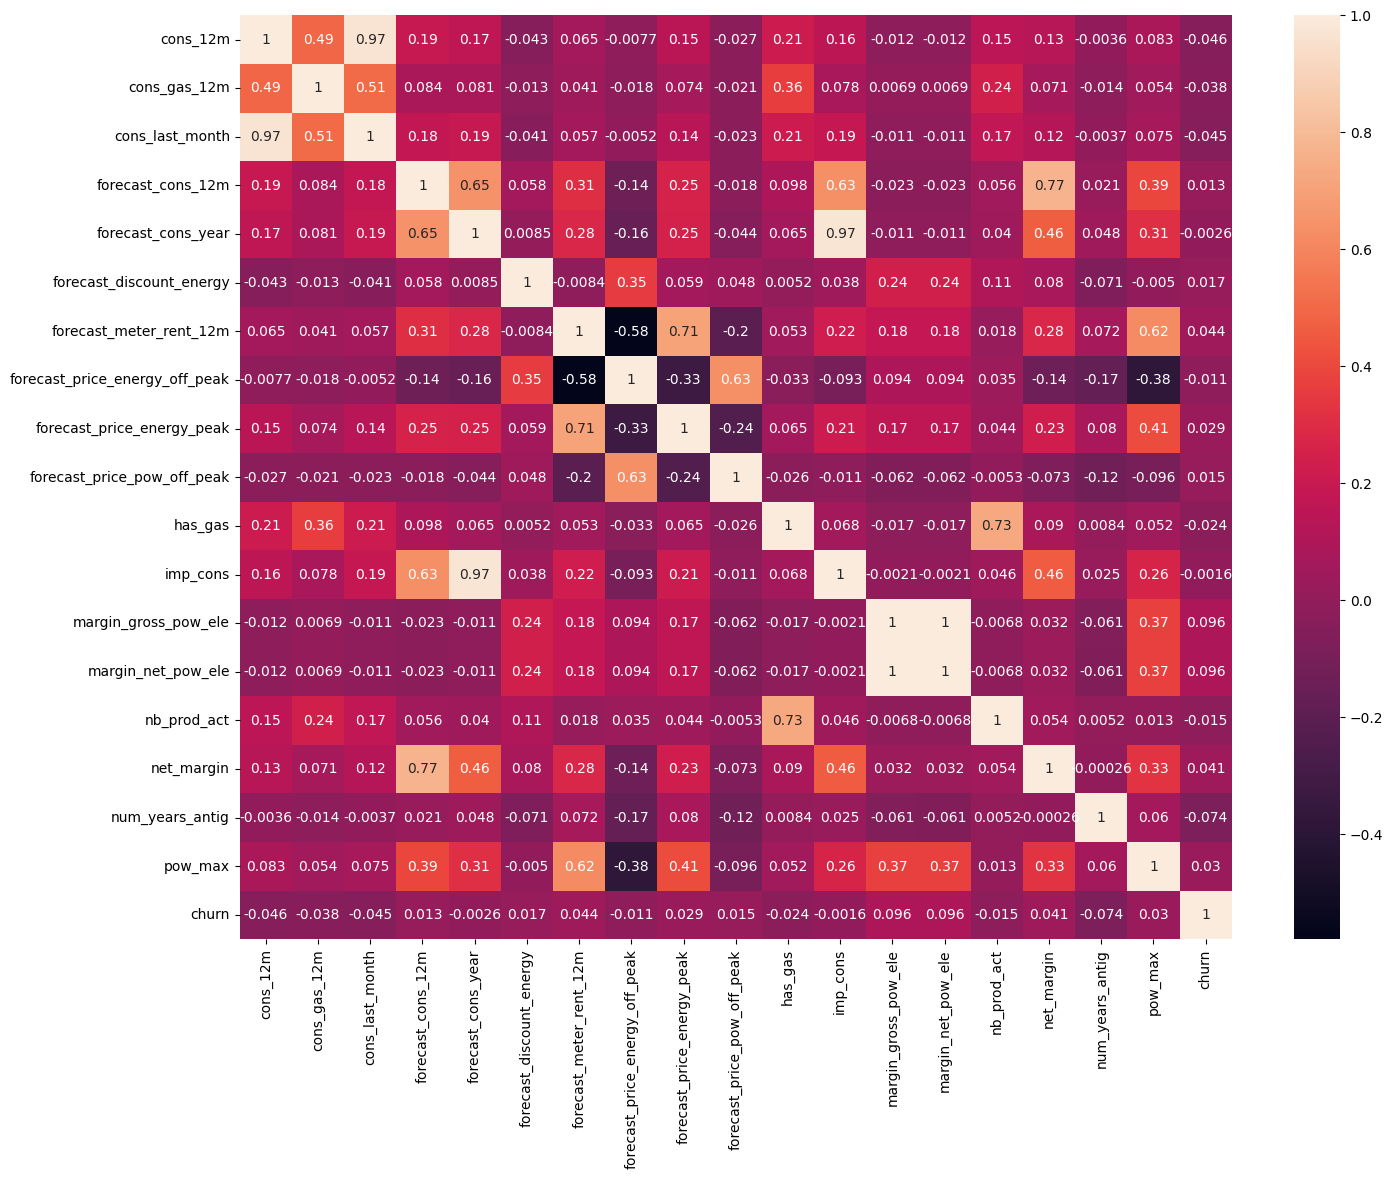

In [60]:
# Lets make a quick run on correlation heatmap to check churn correlation

numerical_cols = client_df.select_dtypes(include=['int64', 'float64'])
corrMatrix = numerical_cols.corr() 
plt.figure(figsize=(16,12))
sns.heatmap(corrMatrix, annot=True) 
plt.show()

There is no feature that directly affects the churn in numerical features. However two features "margin_gross_pow_ele" and "margin_net_pow_ele" have correlation coefficient of 1, which can confuse the model. Directly dropping features do not always result in increased accuracy but during model test, if accuracy found to be low, this two features can be adressed.

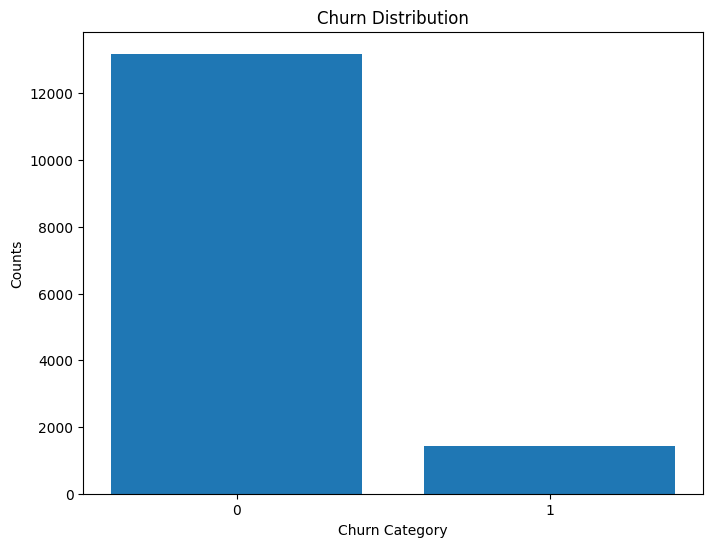

In [73]:
plt.figure(figsize=(8,6))
# Count the occurrences of each unique value in the 'churn' column
churn_counts = client_df['churn'].value_counts()

# Create a bar plot
plt.bar(churn_counts.index, churn_counts.values)

# Adding labels
plt.xlabel('Churn Category')
plt.xticks([0, 1])
plt.ylabel('Counts')
plt.title('Churn Distribution')

# Display the plot
plt.show()

In [84]:
# Finding ratio of churn
print(f'Churn false count: {client_df.churn.value_counts()[0]}')
print(f'Churn true count: {client_df.churn.value_counts()[1]}')
print(f'Churn ratio: {client_df.churn.value_counts()[1]/client_df.churn.value_counts().sum():.3f}')

Churn false count: 13187
Churn true count: 1419
Churn ratio: 0.097


### Simple categorical visuals

We will use categorical features to see if there is any connection between churn. One example being channel sales, we can see if some of the sales channels have high probability of customer churn.

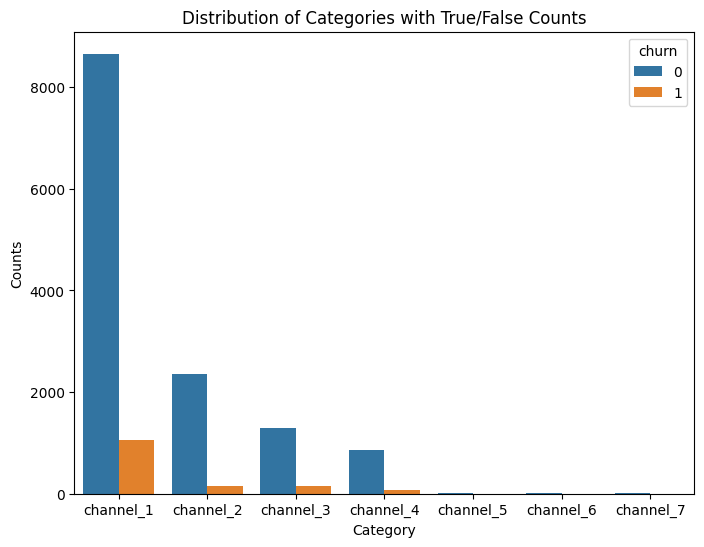

In [87]:

category_feature = 'channel_sales' 
binary_feature = 'churn' 

# Create a count plot
plt.figure(figsize=(8,6))
sns.countplot(x=category_feature, hue=binary_feature, data=client_df)

plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Distribution of Categories with True/False Counts')
plt.show()


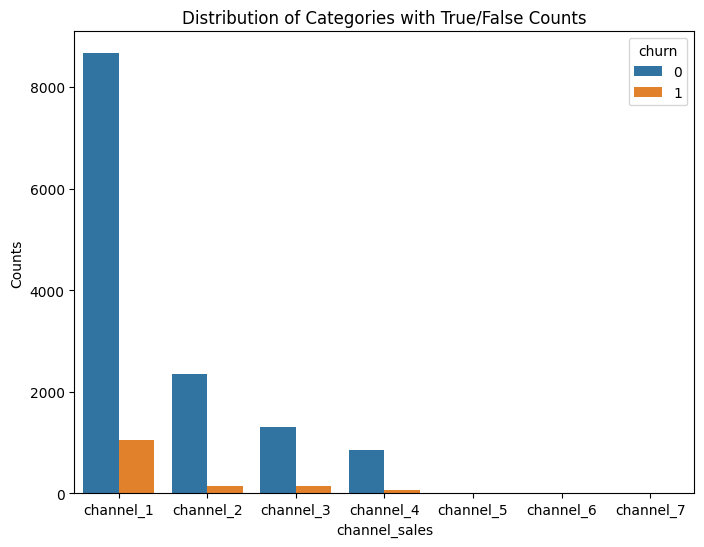

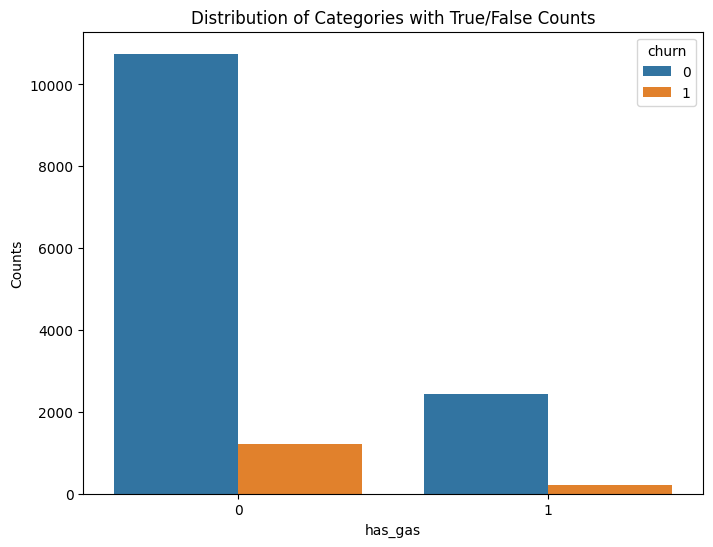

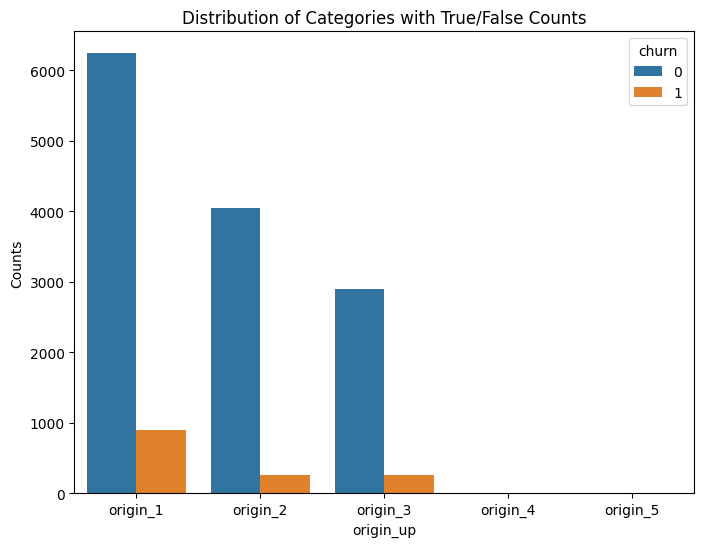

In [90]:

category_feature = ['channel_sales','has_gas','origin_up']
binary_feature = 'churn' 

# Create a count plot
for category in category_feature:
    plt.figure(figsize=(8,6))
    sns.countplot(x=category, hue=binary_feature, data=client_df)

    plt.xlabel(category)
    plt.ylabel('Counts')
    plt.title('Distribution of Categories with True/False Counts')
    plt.show()


Only noticeable point is "origin_up", which is code of the electricity campaign the customer first subscribed to, seems to be higher in churn ratio with origin_1 but also the majority of the customers are also from origin_1 so this might not be suitable directly make assumptions.

In [91]:
# 18/01, note: try dates